#RNN#

Epoch 1/200
12/12 [==============================] - 0s 3ms/step - loss: 2.1561 - accuracy: 0.2632
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 1.2397 - accuracy: 0.4386
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 1.1380 - accuracy: 0.4737
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 1.0302 - accuracy: 0.6140
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.9163 - accuracy: 0.7368
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7414 - accuracy: 0.7895
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.8947
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.8596
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.8947
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.9123
Epoch 11/

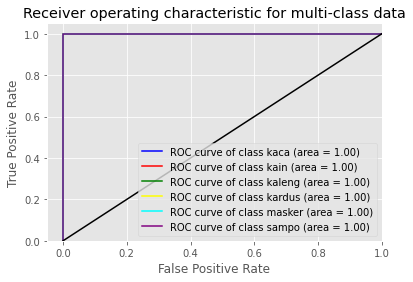

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Membaca file Excel
dataframe = pandas.read_csv("datasetsampah.csv", header = None)
dataset = dataframe.values
ilabel = 1000
jclass = 6
X = dataset[:,0:ilabel].astype(float)
Y = dataset[:,ilabel]

# Encode nilai kelas sebagai integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# Konversi integers menjadi variable dummy
dummy_y = np_utils.to_categorical(encoded_Y)

# Membuat model
model = Sequential()
model.add(Dense(8, input_dim=ilabel, activation='relu'))
model.add(Dense(jclass, activation='softmax'))

# Mengcompile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nepochs = 200
nbatch = 5

# ------------ menggunakan packages
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.20)

model.fit(X_train, y_train, epochs=nepochs, batch_size=nbatch)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy Score: %.2f' % (accuracy*100))

model.save_weights("model.h5")
y_score = model.predict(X_test)
y_score
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + '%')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'purple'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#Naive Bayes#

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 4 0 0 3]
 [0 0 0 1 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]
Accuracy Score:  0.8
              precision    recall  f1-score   support

        kaca       1.00      1.00      1.00         1
        kain       1.00      1.00      1.00         1
      kaleng       1.00      0.57      0.73         7
      kardus       1.00      1.00      1.00         1
      masker       1.00      1.00      1.00         3
       sampo       0.40      1.00      0.57         2

    accuracy                           0.80        15
   macro avg       0.90      0.93      0.88        15
weighted avg       0.92      0.80      0.82        15



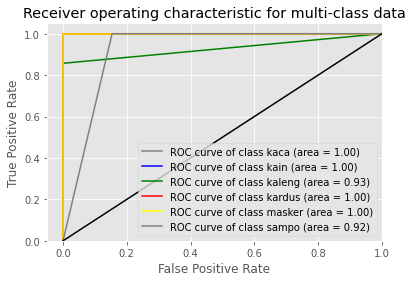

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# dataframe = pandas.read_csv("datasetbaru.csv", header=None)
dataframe = pandas.read_csv("datasetsampah.csv")
dataset = dataframe.values
X = dataset[:,0:1000].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1

# membagi dataset menjadi data training dan data testing
# data training sebesar 80%, data testing sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
, random_state=0)

#-----------
# create model 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
clf = model.fit(X_train, y_train)
#------------

y_pred = model.predict(X_test)
# Use score method to get accuracy of the model
#score_te = model.score(X_test, y_test)
#print('Accuracy Score: ', score_te)

cm = confusion_matrix(y_test, y_pred)
print (cm)

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize

classes = ['kaca', 'kain', 'kaleng', 'kardus', 'masker','sampo']
# Binarize the output
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#SVM#

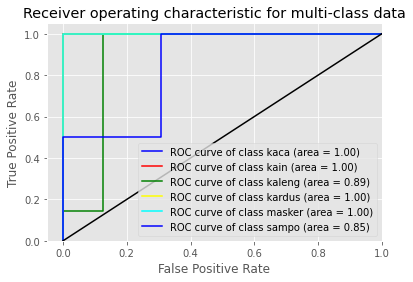

Accuracy Score:  0.6666666666666666
              precision    recall  f1-score   support

        kaca       1.00      1.00      1.00         1
        kain       1.00      1.00      1.00         1
      kaleng       0.75      0.43      0.55         7
      kardus       1.00      1.00      1.00         1
      masker       1.00      1.00      1.00         3
       sampo       0.20      0.50      0.29         2

    accuracy                           0.67        15
   macro avg       0.83      0.82      0.81        15
weighted avg       0.78      0.67      0.69        15



In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import pandas
plt.style.use('ggplot')

# dataframe = pandas.read_csv("datasetall.csv", header=None)
dataframe = pandas.read_csv("datasetsampah.csv")
dataset = dataframe.values
X = dataset[:,0:1000:].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1
classes = ['kaca', 'kain', 'kaleng', 'kardus', 'masker','sampo']
# Binarize the output
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]
# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size
= 0.2, random_state=0)
#We define the model as an SVC in OneVsRestClassifier setting.
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True
))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
# We split the data into training and test sets for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# the model
classifier_svc = svm.SVC(kernel='rbf',random_state=0)
# fit the model using the training set
classifier_svc.fit(X_train, y_train)
# predict the labels/classes of the test set
y_pred = classifier_svc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)
print(classification_report(y_test, y_pred))

#Decision Tree#

Accuracy Score: 0.7727272727272727
              precision    recall  f1-score   support

        kaca       1.00      1.00      1.00         2
        kain       1.00      1.00      1.00         2
      kaleng       0.67      0.80      0.73         5
      kardus       0.75      1.00      0.86         3
      masker       1.00      0.57      0.73         7
       sampo       0.50      0.67      0.57         3

    accuracy                           0.77        22
   macro avg       0.82      0.84      0.81        22
weighted avg       0.82      0.77      0.77        22



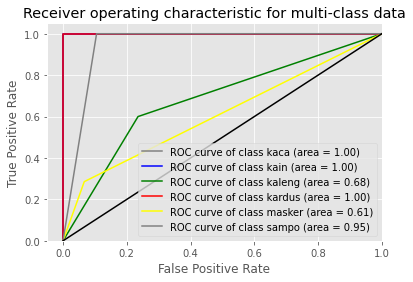

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
y_score = clf.predict_proba(X_test)
from sklearn.preprocessing import label_binarize


# Membaca file Excel
df= pd.read_csv("datasetsampah.csv", header=None)
dataset = df.values
X = dataset[:,0:1000:].astype(float)
y = dataset[:,1000]

# Membagi dataset menjadi data training dan testing
# Training = 70%, Testing = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Membuat Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Prediksi respons dataset test
y_pred = clf.predict(X_test)

# Menggunakan skor akurasi untuk mendapatkan akurasi dari model
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

classes = ['kaca', 'kain', 'kaleng', 'kardus', 'masker','sampo']

# Mengubah output menjadi biner
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

# Plotting dan estimasikan FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
